## Importing libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Defining the Objective function

In [74]:
def obj_fun(x):
     return (x[0]-2)**4 + (x[0]-2*x[1])**2


def der_fun(x):
    return np.array([4*(x[0]-2)**3 + 2*(x[0]-2*x[1]), 
                     -4*(x[0]-2*x[1])])


def hes_fun(x):
    return np.array([[12*(x[0]-2)**2, -4], 
                     [-4, 8]])



In [75]:
der_fun([0.0,3.0])

array([-44.,  24.])

### Visualizing the function

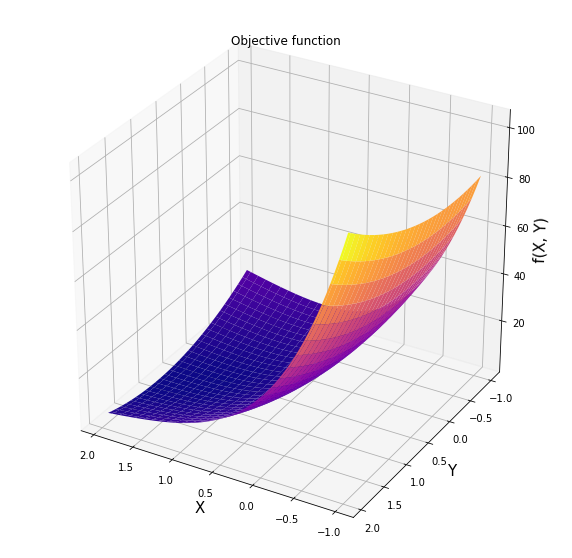

In [76]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = "3d")
X = np.arange(-1, 2, 0.05)
Y = np.arange(-1, 2, 0.05)
xmesh, ymesh = np.meshgrid(X, Y)
ax.plot_surface(xmesh, ymesh, obj_fun([xmesh, ymesh]), cmap = cm.plasma)
ax.view_init(elev = 30, azim = 120)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
ax.set_zlabel('f(X, Y)', fontsize = 15)
plt.title("Objective function")
plt.show()

## Backtracking Line Search

In [77]:
def bls(func, der_func, x, p, rho, alpha_bar = 1, c = 0.5):
    alpha = alpha_bar
    while(func(x + alpha*p) > func(x) + c*alpha*np.matmul(der_func(x).T, p)):
        alpha = rho*alpha
    return alpha

## DFP function

In [78]:
def dfp(x_init, f, grad_f, precision = 1e-2, iterations = 100, rho=0.2):
    x1 = x_init
    y1 = x1
    D1 = np.identity(2, dtype = float)
    d1 = -np.matmul(D1, grad_f(y1))
    k = 0
    j = 1
    col_x1 = [x1[0]]
    col_x2 = [x1[1]]
    col_y1 = [y1[0]]
    col_y2 = [y1[1]]    
    direct = [d1]
    Hess = [D1]
    alpha = np.array([0.062, 0.22, 0.11, 0.64, 0.10, 2.64, 0.10])
    while np.linalg.norm(grad_f(y1)) > precision:
#        alpha = bls(f, grad_f, y1, d1, rho, alpha_bar = 1)
#        print(d1)
        y2 = y1 + alpha[k]*d1
        k = k+1
        if k == 7:
            break
        if j < 2:
            p = alpha[k]*d1
            q = grad_f(y2)-grad_f(y1)
            r1 = np.outer(p, p)/np.matmul(p.T, q)
            r2 = np.outer(np.matmul(D1, q), np.matmul(q.T, D1))/np.matmul(q.T, np.matmul(D1, q))
            D1 = D1 + r1 - r2
            j = j+1
            y1 = y2
            d1 = -np.matmul(D1, grad_f(y2))
            x1 = 'NULL'
        else:
            y1 = y2
            x1 = y2
            D1 = np.identity(2, dtype = float)
            d1 = -np.matmul(D1, grad_f(y1))
            j = 1
        col_x1.append(x1[0])
        col_x2.append(x1[1])
        col_y1.append(y1[0])
        col_y2.append(y1[1])
        direct.append(d1)
        Hess.append(D1)
        
    df = pd.DataFrame({'X1': col_x1, 'X2': col_x2, 'Y1': col_y1, 'Y2': col_y2, 'Directions': direct, 'Hessians': Hess})
    return df

In [79]:
x_init = np.array([0.0, 3.0])
DFP = dfp(x_init, obj_fun, der_fun)
DFP

,X1,X2,Y1,Y2,Directions,Hessians
0,0,3,0.000000,3.000000,"[44.0, -24.0]","[[1.0, 0.0], [0.0, 1.0]]"
1,N,U,2.728000,1.512000,"[-0.7242567286637985, -1.2972956437841536]","[[0.373504432708747, 0.3116021569936944], [0.3..."
2,2.56866,1.22659,2.568664,1.226595,"[-0.9665207444205575, 0.46189441183596713]","[[1.0, 0.0], [0.0, 1.0]]"
3,N,U,2.462346,1.277403,"[-0.3173404381820384, -0.263448078970401]","[[1.0837358684070337, 0.2414826436922589], [0...."
4,2.25925,1.1088,2.259248,1.108797,"[-0.1530064507256781, 0.16662084445770553]","[[1.0, 0.0], [0.0, 1.0]]"
5,N,U,2.243948,1.125459,"[-0.06283087246679976, -0.0065702976738143196]","[[2.0210331893837976, -0.9454806677334202], [-..."
6,2.07807,1.10811,2.078074,1.108113,"[0.27440023788275586, -0.5526077377771763]","[[1.0, 0.0], [0.0, 1.0]]"


## Contour Plot

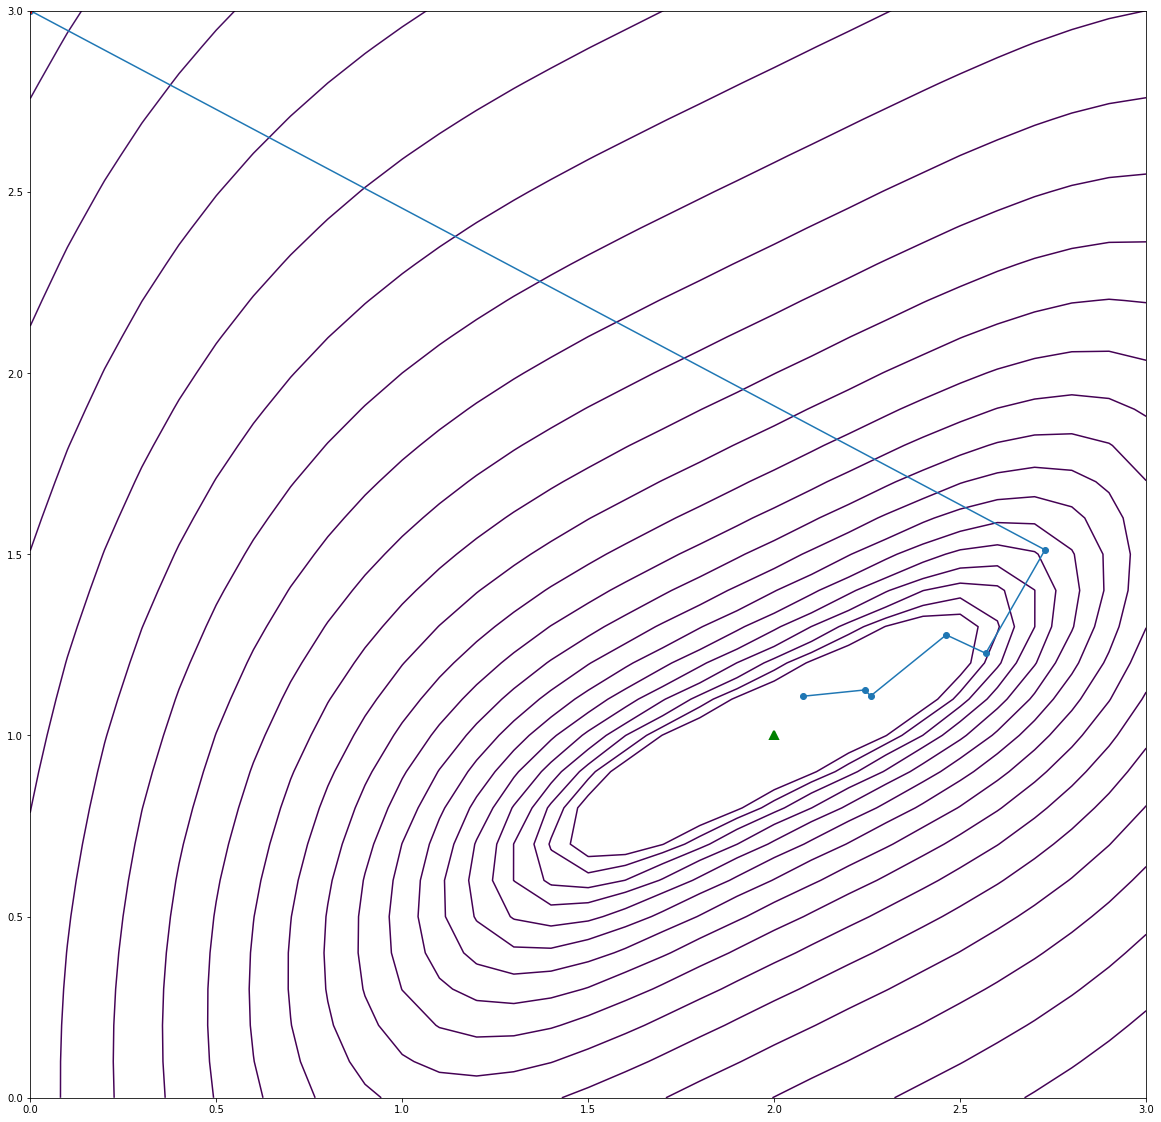

In [80]:
fig = plt.figure(figsize=(20, 20))
X, Y = np.meshgrid(np.linspace(0, 3, 31), np.linspace(0, 3, 31))
Z = obj_fun([X, Y])
plt.plot(np.array(DFP['Y1']), np.array(DFP['Y2']), marker = 'o')
plt.plot([0], [3], 'x', mew=1, markersize=5, color='red', marker = '*')
plt.plot([2], [1], 'y', mew = 2, markersize = 8, color = 'green', marker = '^')
plt.contour(X, Y, Z, np.logspace(-1, 3, 31))
plt.show()

## Backtracking Line Search

In [81]:
def bls(func, der_func, x, p, rho, alpha_bar = 1, c = 0.5):
    alpha = alpha_bar
    while(func(x + alpha*p) > func(x) + c*alpha*np.matmul(der_func(x).T, p)):
        alpha = rho*alpha
    return alpha

## Fletcher-Reeves

In [88]:
def conj_grad(x_init, f, grad_f, precision = 1e-2, iterations = 100, rho = 0.7):
    x1 = x_init
    y1 = x1
    d1 = -grad_f(y1)
    k = 0
    j = 1
    col_x1 = [x1[0]]
    col_x2 = [x1[1]]
    col_y1 = [y1[0]]
    col_y2 = [y1[1]]    
    direct = [d1]
    alpha = np.array([0.062, 0.23, 0.11, 0.63, 0.10, 1.02, 0.11])
    while np.linalg.norm(grad_f(y1)) > precision:
#        alpha = bls(f, grad_f, y1, d1, rho, alpha_bar = 1)
#        print(d1)
        y2 = y1 + alpha[k]*d1
        k = k+1
        if k ==7:
            break
        if j < 2: 
            beta = np.dot(grad_f(y2).T, grad_f(y2))/np.linalg.norm(grad_f(y1))**2
            d1 = -grad_f(y2) + beta*d1
#            print(d1)
            y1 = y2
            x1 = 'NULL'
            j = j+1
        else:
            y1 = y2
            x1 = y2
            d1 = -grad_f(y1)
            j = 1
        col_x1.append(x1[0])
        col_x2.append(x1[1])
        col_y1.append(y2[0])
        col_y2.append(y2[1])
        direct.append(d1)
        
    df = pd.DataFrame({'X1': col_x1, 'X2': col_x2, 'Y1': col_y1, 'Y2': col_y2, 'Directions': direct})
    return df

In [91]:
x_init = np.array([0.0, 3.0])
fr = conj_grad(x_init, obj_fun, der_fun)
fr

,X1,X2,Y1,Y2,Directions
0,0,3,0.000000,3.000000,"[44.0, -24.0]"
1,N,U,2.728000,1.512000,"[-0.9109067436645738, -1.2060399987284143]"
2,2.51849,1.23461,2.518491,1.234611,"[-0.6560909371201868, 0.19707939348887393]"
3,N,U,2.446321,1.256290,"[-0.39091509185858575, -0.2146271023971595]"
4,2.20004,1.12107,2.200045,1.121074,"[0.05218638516965501, -0.1684159205161695]"
5,N,U,2.205264,1.104233,"[-0.026579911966661384, -0.018002375362296368]"
6,2.17815,1.08587,2.178152,1.085870,"[-0.03543923028488359, 0.025644712096989153]"


## Contour Plot

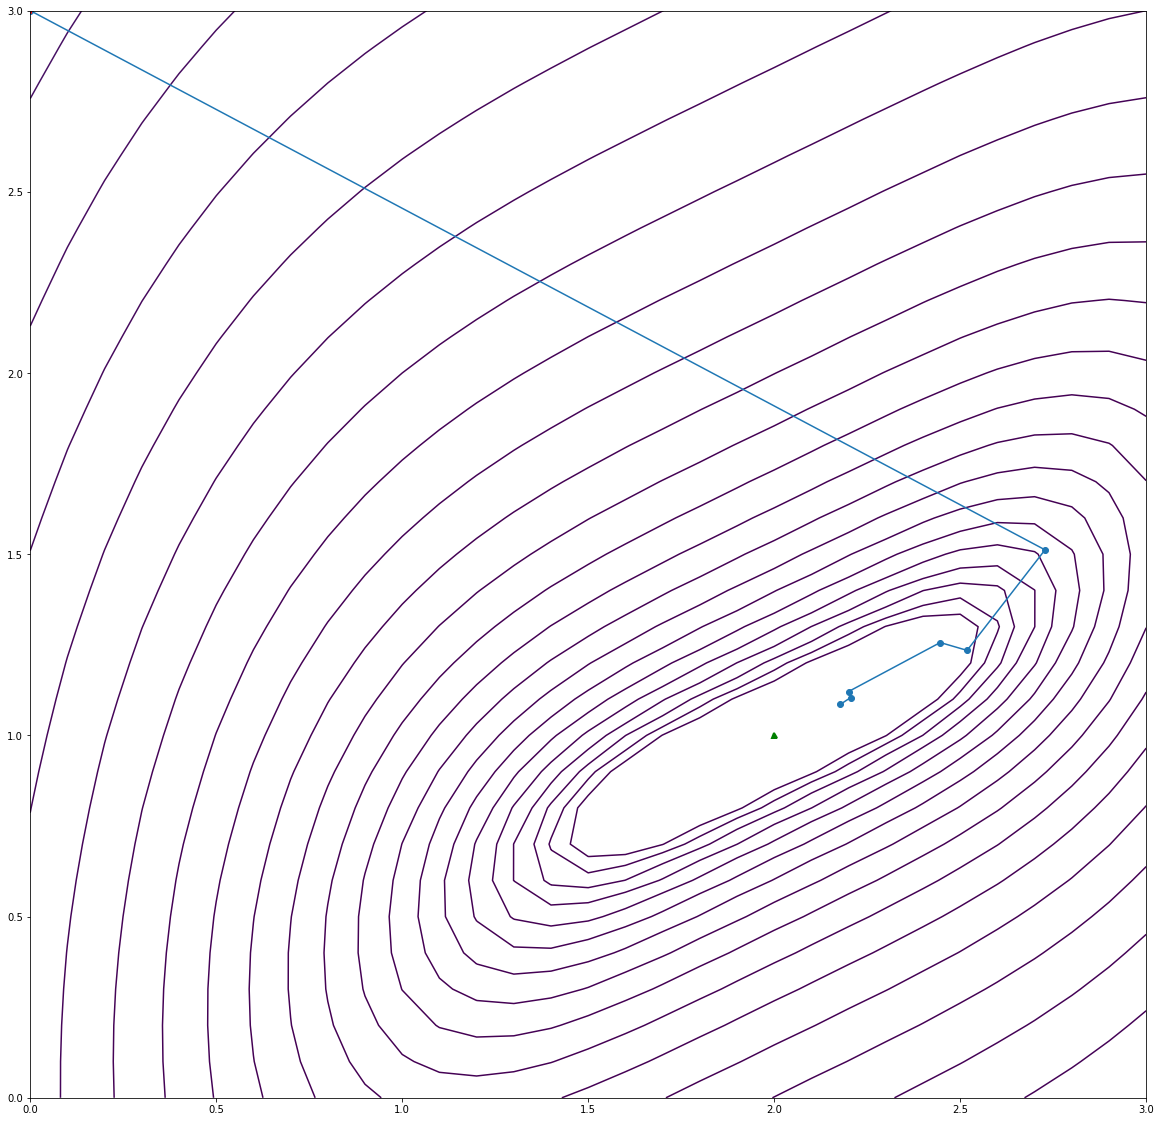

In [94]:
fig = plt.figure(figsize=(20, 20))
X, Y = np.meshgrid(np.linspace(0, 3, 31), np.linspace(0, 3, 31))
Z = obj_fun([X, Y])
plt.plot(np.array(fr['Y1']), np.array(fr['Y2']), marker = 'o')
plt.plot([0], [3], 'x', mew=1, markersize=5, color='red', marker = '*')
plt.plot([2], [1], 'y', mew = 2, markersize = 5, color = 'green', marker = '^')
plt.contour(X, Y, Z, np.logspace(-1, 3, 31))
plt.show()

In [95]:
iden_dir = DFP.Directions - fr.Directions

for i in iden_dir:
    print(np.linalg.norm(i))

0.0
0.20776385839295708
0.4080363454432908
0.08829902274198101
0.3928787774707724
0.038010847628776726
0.6560307857257004


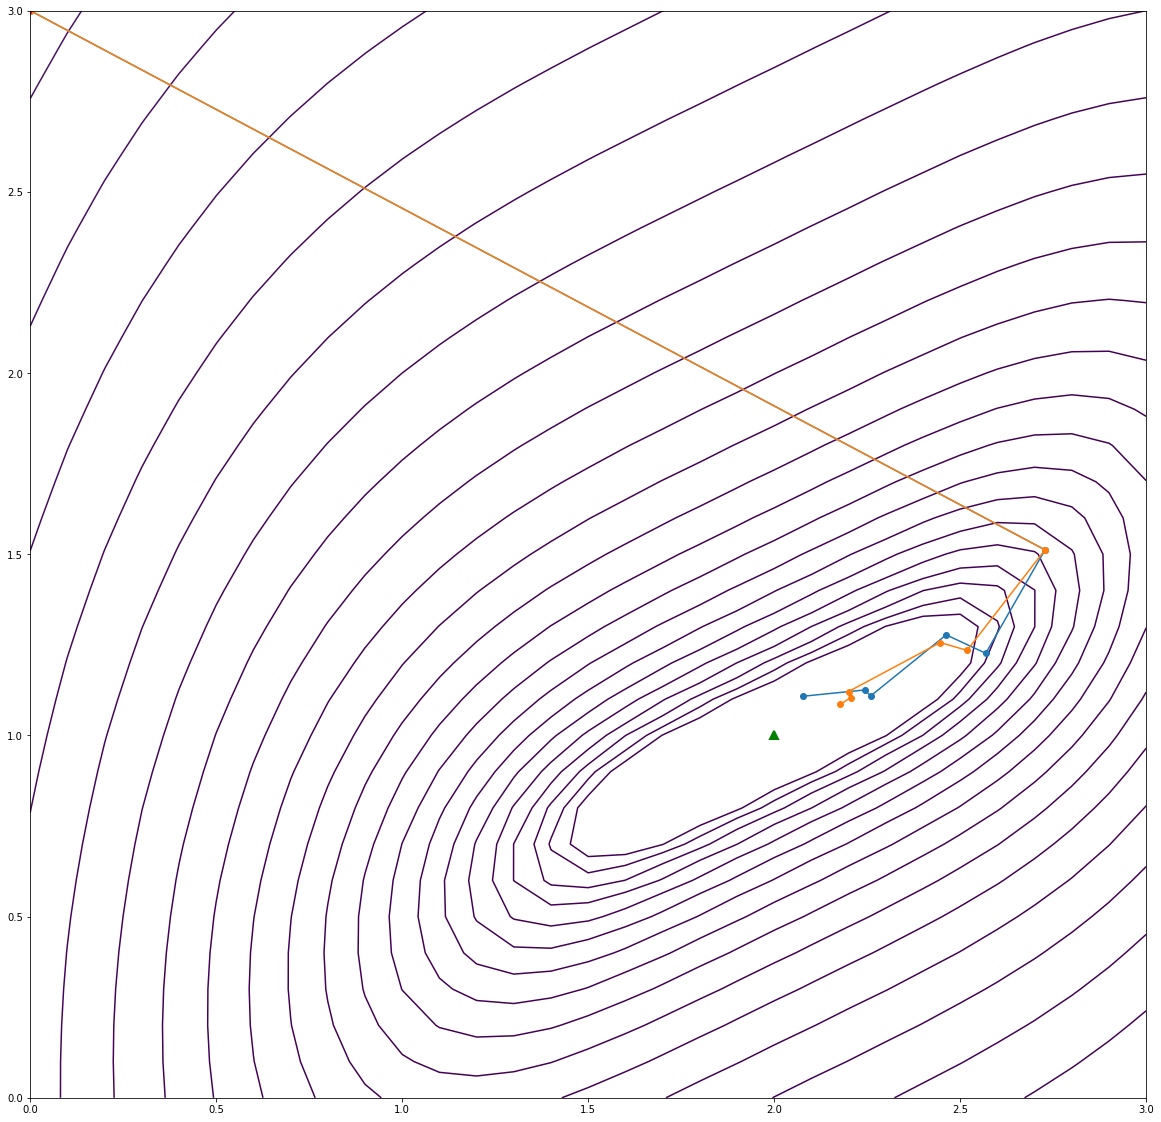

In [96]:
fig = plt.figure(figsize=(20, 20))
X, Y = np.meshgrid(np.linspace(0, 3, 31), np.linspace(0, 3, 31))
Z = obj_fun([X, Y])
plt.plot(np.array(DFP['Y1']), np.array(DFP['Y2']), marker = 'o')
plt.plot(np.array(fr['Y1']), np.array(fr['Y2']), marker = 'o')
plt.plot([0], [3], 'x', mew=1, markersize=5, color='red', marker = '*')
plt.plot([2], [1], 'y', mew = 2, markersize = 8, color = 'green', marker = '^')
plt.contour(X, Y, Z, np.logspace(-1, 3, 31))
plt.show()